In [5]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

In [6]:
df_US= df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

C:\Users\user\AppData\Local\Temp\ipykernel_19244\2128336273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US['job_posted_month'] = df_US['job_posted_date'].dt.month


Text(0.5, 1.0, 'Top 10 Skills for Data Analyst Jobs in the US Over Time')

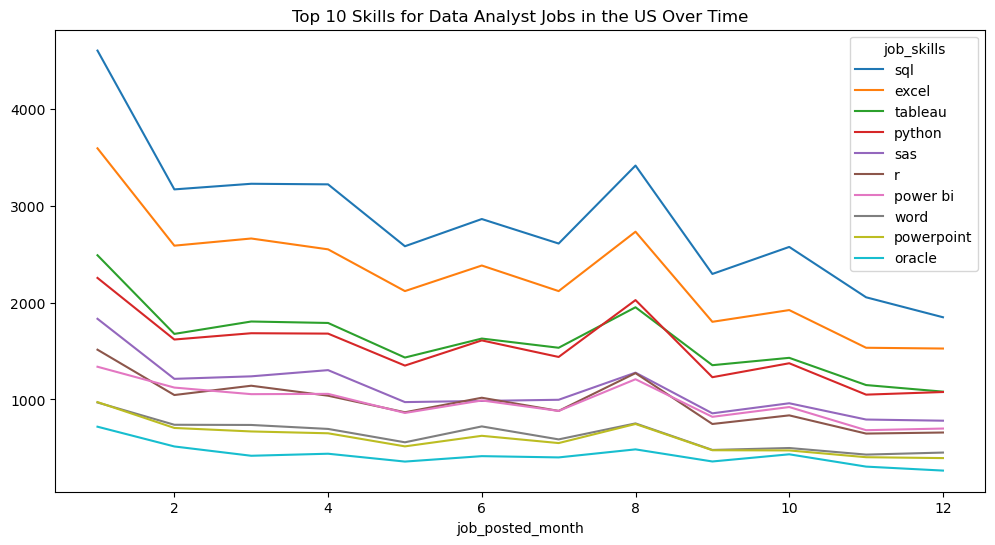

In [ ]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.month
df_US_skills_counts = df_US.explode('job_skills').groupby(['job_posted_month', 'job_skills']).size().reset_index(name='skills_count')
df_US_skills_counts_pivot = df_US_skills_counts.pivot(index='job_posted_month', columns='job_skills', values='skills_count').fillna(0)
df_US_skills_counts_pivot['Total'] = df_US_skills_counts_pivot.sum(axis=1)
top_skills_US = df_US_skills_counts_pivot.drop(columns=['Total']).sum().sort_values(ascending=False).head(10).index .tolist()
df_US_top_skills = df_US_skills_counts_pivot[top_skills_US]
df_US_top_skills.plot(kind='line', figsize=(12, 6))
plt.title('Top 10 Skills for Data Analyst Jobs in the US Over Time')

In [27]:
DA_totals = df_US.groupby('job_posted_month').size()
df_US_top_skills_percentage = df_US_top_skills.div(DA_totals/100, axis=0)
df_US_top_skills_percentage

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle
job_posted_month,,,,,,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026
2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207
3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419
4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398
5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038
6,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885
7,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056
8,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749
9,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737
